# Exercícios - Estatística I

### Questão 1

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Calcule a frequência absoluta para os sobreviventes no _Titanic_.

__Dica.:__ Utilize a função `.value_counts()`

Carregando as principais bibliotecas que iremos utilizar:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# sns.load_dataset('titanic')

In [18]:
#Padronizações

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
colors = sns.color_palette('pastel')

#sns.color_palette('deep') # deep, pastel, Set1 Set2 Set3

In [4]:
ttc = sns.load_dataset('titanic')

In [5]:
ttc

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Calcule a frequência absoluta para os sobreviventes no Titanic

Frequência absoluta (ƒi): É o número de observações correspondente a cada classe. A frequência absoluta é, geralmente, chamada apenas de frequência.

In [6]:
absolute_frequencies = ttc['survived'].value_counts()

In [7]:
absolute_frequencies

0    549
1    342
Name: survived, dtype: int64

In [8]:
# Print da Tabela de Frequencia absoluta
display(ttc["survived"].value_counts())

0    549
1    342
Name: survived, dtype: int64

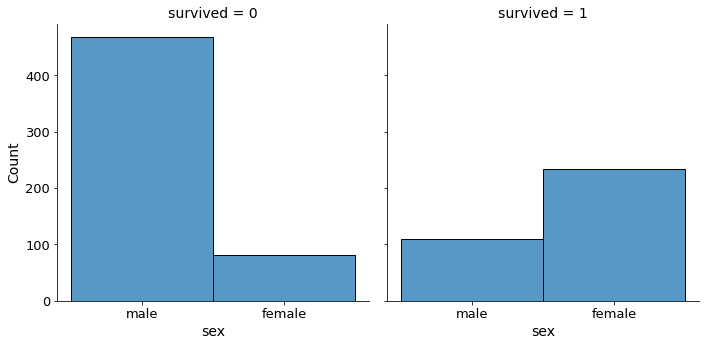

In [187]:
sns.displot(ttc, x="sex", col="survived")
plt.show()

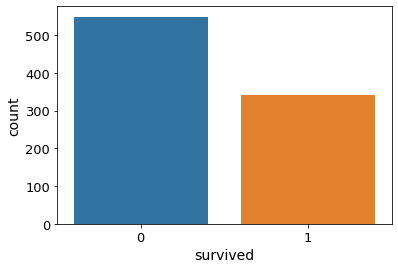

In [7]:
sns.countplot(x='survived', data=ttc)
plt.show()

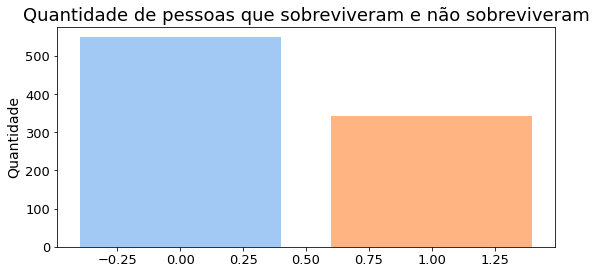

In [26]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('pastel')
plt.bar(survd_freq_table.index, survd_freq_table['qtd'], color=colors[:5])
#plt.xlabel('Sobreviventes')
plt.ylabel('Quantidade')
plt.title('Quantidade de pessoas que sobreviveram e não sobreviveram')
plt.show()


### Questão 2

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Calcule a frequência relativa, relativa percentual e acumulativa para os sobreviventes no _Titanic_.

__Dica.:__ Utilize a função `.value_counts()`

In [9]:
#Calculando a frequencia relativa
relative_frequencies = ttc['survived'].value_counts(normalize=True)
relative_frequencies

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [10]:
# Print da Tabela de Frequencia relativa
display(ttc["survived"].value_counts(normalize=True))

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [12]:
#Cria um dataset com a frequencia absoluta e frequencia relativa
survd_freq_table = pd.concat([absolute_frequencies,
           round(relative_frequencies*100,2)],
          axis = 1,
          keys = ("qtd","pct"))

survd_freq_table

,qtd,pct
0,549,61.62
1,342,38.38


In [13]:
# Print da Tabela de Frequencia Percentual
ttc["survived"].value_counts(normalize=True).apply(lambda x: str(round(x*100, 2)) + "%")

0    61.62%
1    38.38%
Name: survived, dtype: object

In [14]:
#Total sum per column: 
survd_freq_table.loc['Total',:]= round(survd_freq_table.sum(axis=0),2)

#Total sum per row: 
#survd_freq_table.loc[:,'Total'] = survd_freq_table.sum(axis=1)

survd_freq_table

,qtd,pct
0,549.0,61.62
1,342.0,38.38
Total,891.0,100.00


### Questão 3

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Utilizando a coluna `Age` do _dataset Titanic_, defina as principais métricas estatísticas para essa variável tais como:
- Média;
- Desvio Padrão;
- Mínimo;
- Primeiro Quartil;
- Segundo Quartil (Mediana);
- Terceiro Quartil;
- Distância Interquartil (IQR);
- Máximo;
- Skewness;
- Moda.


Skewness é uma medida da assimetria da distribuição da probabilidade de uma variável aleatória de valor real sobre a sua média.

In [87]:
ttc['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [141]:
mea = ttc['age'].mean()
std = ttc['age'].std()
mi = ttc['age'].min()
#q1 = ttc['age'].describe()['25%']
#q1 = ttc["age"].quantile(0.25)
q1 = np.percentile(ttc['age'].dropna(), 25)
med = ttc['age'].median()
#q3 = ttc['age'].describe()['75%']
#q3 = ttc["age"].quantile(0.75)
q3 = np.percentile(ttc['age'].dropna(), 75)
maxx = ttc['age'].max()
#iqr = ttc["age"].quantile(0.75) - ttc["age"].quantile(0.25)
iqr = np.subtract(*np.percentile(ttc['age'].dropna(), [75 ,25]))
ske = ttc['age'].skew(axis = 0, skipna = True)
mod = int(ttc['age'].mode().values[0])

print(f'Média.......................= {mea};\nDesvio Padrão...............= {std};\nMínimo......................= {mi};')
print(f'Primeiro Quartil............= {q1}; \nSegundo Quartil (Mediana)...= {med};\nTerceiro Quartil............= {q3}')
print(f'Distância Interquartil (IQR)= {iqr};\nMáximo..................... = {maxx};\nSkewness....................= {ske}')
print(f'Moda........................= {mod}')


Média.......................= 29.69911764705882;
Desvio Padrão...............= 14.526497332334044;
Mínimo......................= 0.42;
Primeiro Quartil............= 20.125; 
Segundo Quartil (Mediana)...= 28.0;
Terceiro Quartil............= 38.0
Distância Interquartil (IQR)= 17.875;
Máximo..................... = 80.0;
Skewness....................= 0.38910778230082704
Moda........................= 24


### Questão 4

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Crie um gráfico da dispersão das idades dos passageiros do _Titanic_ e identifique os pontos onde se encontram a média, mediana e moda das idades.

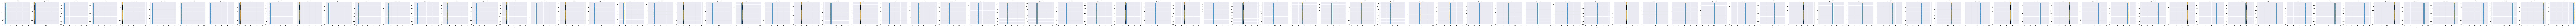

In [15]:
# Set our x_var for later use
x_var = "age"

g = sns.displot(
    data=ttc,
    x=x_var,
    col="age",
    facet_kws=dict(sharey=False, sharex=False),
)

for (row, col, hue_idx), data in g.facet_data():
    # Skip empty data
    if not data.values.size:
        continue

    # Get the ax for `row` and `col`
    ax = g.facet_axis(row, col)
    # Set the `vline`s using the var `x_var`
    ax.axvline(data[x_var].mean(), c="k", ls="-", lw=2.5)
    ax.axvline(data[x_var].median(), c="orange", ls="--", lw=2.5)
    

In [ ]:

#seaborn.set(style='whitegrid')
#snsttc = seaborn.load_dataset("titanic")
 
seaborn.scatterplot(x="age",
                    y="signal",
                    hue="region",
                    style="event",
                    data=ttc)


### Questão 5

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Ainda trabalhando com os valores das idades crie três _Boxplots_:
- _Boxplot_ das idades para todos os passageiros;
- _Boxplot_ das idades dos passageiros separados pelo sexo.
- _Boxplot_ das idades dos passageiros separados pelo sexo e por sobreviventes.

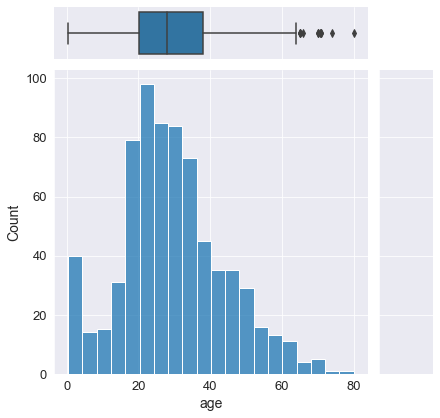

In [45]:
colors = sns.color_palette('Set2')

g = sns.JointGrid(data=ttc, x="age")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)
plt.show()

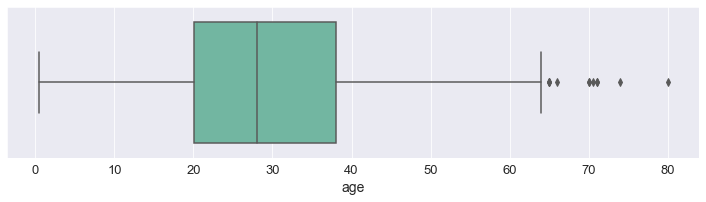

In [42]:
plt.figure(figsize=(10,3), tight_layout=True)
ax = sns.boxplot(data=ttc, x="age", palette=colors)
plt.show()

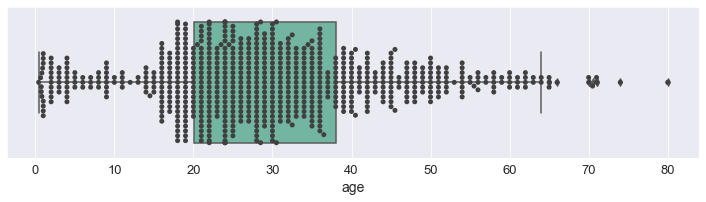

In [43]:
plt.figure(figsize=(10,3), tight_layout=True)
ax = sns.boxplot(data=ttc, x="age", palette=colors)
ax = sns.swarmplot(data=ttc, x="age", color=".25")
plt.show()

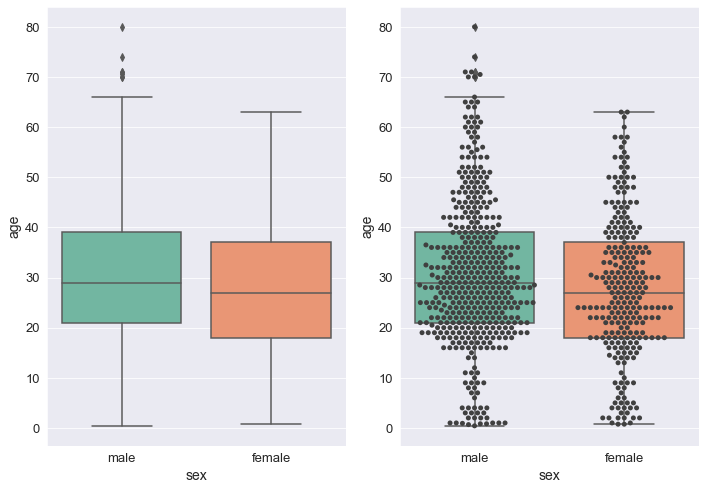

In [41]:
plt.figure(figsize=(10,7), tight_layout=True)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
ax = sns.boxplot(data=ttc, x="sex", y="age", palette=colors)

plt.subplot(1, 2, 2) # index 2
ax = sns.boxplot(data=ttc, x="sex", y="age", palette=colors)
ax = sns.swarmplot(data=ttc, x="sex", y="age", color=".25")

plt.show()

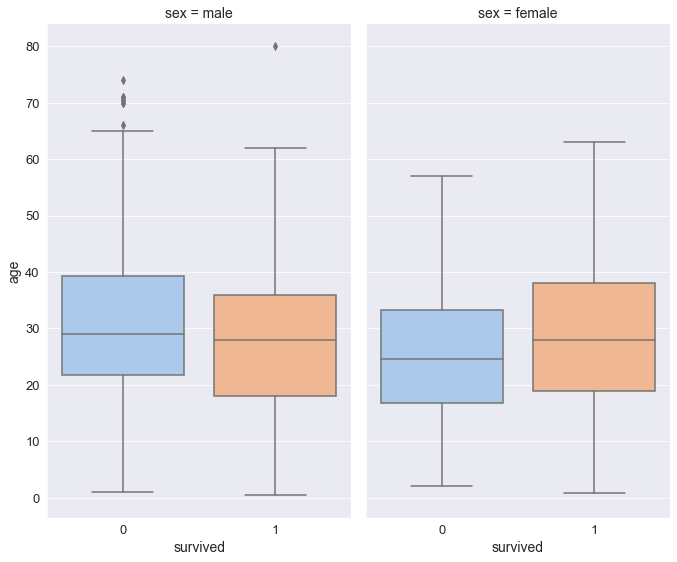

In [44]:
g = sns.catplot(x="survived", y="age",
                col="sex",
                data=ttc, kind="box", palette=colors
               ,height=8, aspect=.6
               );
plt.show()

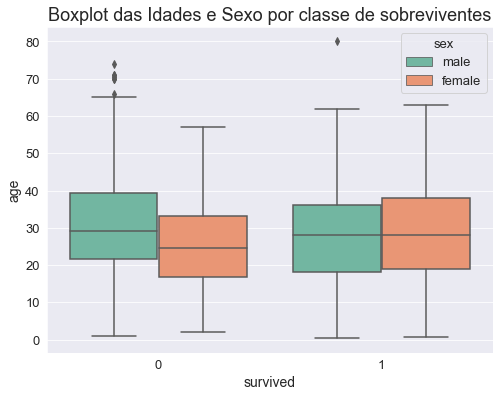

In [47]:
# Define o tamanho da figura
plt.figure(figsize=(8, 6))

# Plot do Boxplot
sns.boxplot(data=ttc, y="age", x="survived", hue="sex", palette=colors)

# Cria um titulo
plt.title("Boxplot das Idades e Sexo por classe de sobreviventes")

# Mostra o gráfico
plt.show()

Com o dataset `penguins`, responda as questões abaixo:

sns.load_dataset('penguins')

### Questão 6

In [50]:
p = sns.load_dataset('penguins')

In [51]:
p

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Classifique o tipo de dado de cada coluna

In [52]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
bill_length_mm 
bill_depth_mm
flipper_length_mm
body_mass_g

- [x] Quantitativo
- [ ] Nominal
- [ ] Ordinal

In [169]:
p['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

- [x] Qualitativo
- [x] Nominal
- [ ] Ordinal

In [171]:
p['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

- [x] Qualitativo
- [x] Nominal
- [ ] Ordinal

In [53]:
p['sex'].unique()

array(['Male', 'Female', nan], dtype=object)

- [x] Qualitativo
- [x] Nominal
- [ ] Ordinal

### Questão 7
Calcule a frequência absoluta para cada espécie de pinguim

In [56]:
absolute_frequencies_peng = p['species'].value_counts()
absolute_frequencies_peng

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

### Questão 8
Calcule a frequência relativa, relativa percentual e acumulativa para os sobreviventes no Titanic

In [57]:
relative_frequencies_peng = p['species'].value_counts(normalize=True)
relative_frequencies_peng

Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: species, dtype: float64

In [58]:
print("Tabela de frequência PERCENTUAL da coluna 'species':")

# Print da Tabela de Frequencia Percentual
p["species"].value_counts(normalize=True).apply(lambda x: str(round(x*100, 2)) + "%")

Tabela de frequência PERCENTUAL da coluna 'species':


Adelie       44.19%
Gentoo       36.05%
Chinstrap    19.77%
Name: species, dtype: object

In [61]:
#Cria um dataset com a frequencia absoluta e frequencia relativa
peng_freq_table = pd.concat([absolute_frequencies_peng,
           round(relative_frequencies_peng*100,2)],
          axis = 1,
          keys = ("qtd","pct"))

peng_freq_table

,qtd,pct
Adelie,152,44.19
Gentoo,124,36.05
Chinstrap,68,19.77


In [62]:
#Total sum per column: 
peng_freq_table.loc['Total',:]= round(peng_freq_table.sum(axis=0),2)

### Questão 9
Utilizando a coluna `body_mass_g` do dataset Penguins, defina as principais métricas estatísticas para essa variável tais como:

- Média;
- Desvio Padrão;
- Mínimo;
- Primeiro Quartil;
- Segundo Quartil (Mediana);
- Terceiro Quartil;
- Distância Interquartil (IQR);
- Máximo;
- Skewness;
- Moda.

In [175]:
mea = p['body_mass_g'].mean()
std = p['body_mass_g'].std()
mi = p['body_mass_g'].min()
#q1 = p['body_mass_g'].describe()['25%']
q1 = np.percentile(p['body_mass_g'].dropna(), 25)
med = p['body_mass_g'].median()
#q3 = ttc['body_mass_g'].describe()['75%']
q3 = np.percentile(p['body_mass_g'].dropna(), 75)
maxx = p['body_mass_g'].max()
iqr = np.subtract(*np.percentile(p['body_mass_g'].dropna(), [75 ,25]))
ske = p['body_mass_g'].skew(axis = 0, skipna = True)
mod = int(p['body_mass_g'].mode().values[0])

print(f'Média.......................= {mea};\nDesvio Padrão...............= {std};\nMínimo......................= {mi};')
print(f'Primeiro Quartil............= {q1}; \nSegundo Quartil (Mediana)...= {med};\nTerceiro Quartil............= {q3}')
print(f'Distância Interquartil (IQR)= {iqr};\nMáximo..................... = {maxx};\nSkewness....................= {ske}')
print(f'Moda........................= {mod}')


Média.......................= 4201.754385964912;
Desvio Padrão...............= 801.9545356980954;
Mínimo......................= 2700.0;
Primeiro Quartil............= 3550.0; 
Segundo Quartil (Mediana)...= 4050.0;
Terceiro Quartil............= 4750.0
Distância Interquartil (IQR)= 1200.0;
Máximo..................... = 6300.0;
Skewness....................= 0.470329330480123
Moda........................= 3800


### Questão 10
Crie um gráfico da dispersão da massa dos pinguins e identifique os pontos onde se encontram a média, mediana e moda das idades.

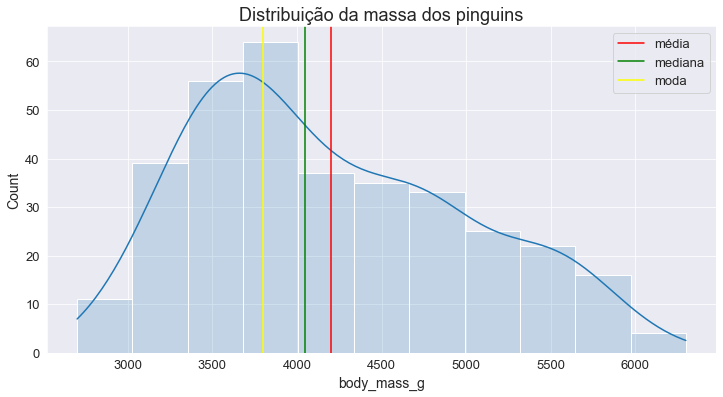

In [64]:
# Define o tamanho da figura
plt.figure(figsize=(12, 6))

# Define o Titulo
plt.title("Distribuição da massa dos pinguins", size=18)

# Plot do Histograma
sns.histplot(p["body_mass_g"], kde=True, alpha=0.2)

# plotando média
plt.axvline(x=p["body_mass_g"].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(p["body_mass_g"].median(), color="green", label="mediana")

# Loop para plotar as modas
for i in range(p["body_mass_g"].mode().shape[0]):
    plt.axvline(p["body_mass_g"].mode()[i], color="yellow", label="moda")

# Cria uma legenda
plt.legend()

# Mostra o Gráfico
plt.show()

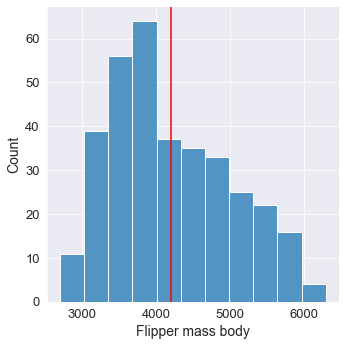

In [199]:
sns.displot(p,
            x = "body_mass_g")
#            ,
#            bins=30,
#           height=8)
plt.xlabel("Flipper mass body")
plt.ylabel("Count")
#plt.xlabel("Flipper mass body", size=14)
#plt.ylabel("Count", size=14)
plt.axvline(x=p.body_mass_g.mean(),
            color='red')
#plt.savefig("Seaborn_displot_histogram_with_mean_line_Python.png")
plt.show()


mean      3700.662252
median    3700.000000
Name: Adelie, dtype: float64
mean      3733.088235
median    3700.000000
Name: Chinstrap, dtype: float64
mean      5076.01626
median    5000.00000
Name: Gentoo, dtype: float64


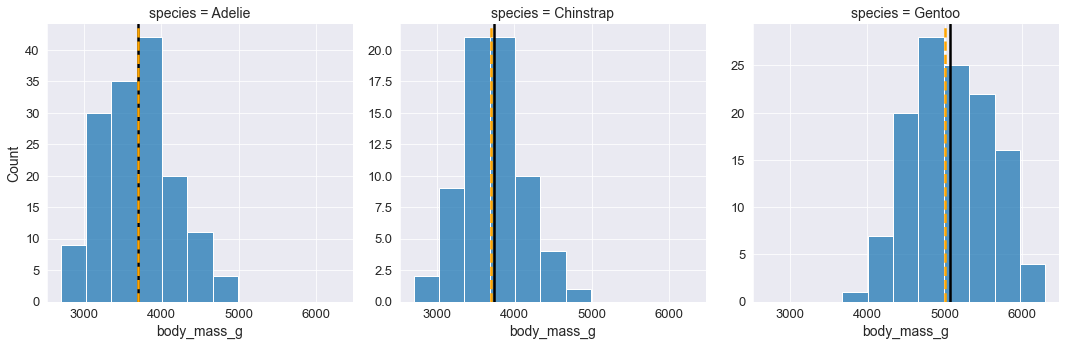

In [307]:
# https://stackoverflow.com/questions/67613774/how-to-add-a-mean-and-median-line-to-a-seaborn-displot
# groupby to get mean and median
pen_g = p.groupby('species').body_mass_g.agg(['mean', 'median'])

g = sns.displot(
    data=p, x='body_mass_g',
    col='species',  
    facet_kws=dict(sharey=False, sharex=False)
)
# extract and flatten the axes from the figure
axes = g.axes.flatten()

# iterate through each axes
for ax in axes:
    # extract the species name
    spec = ax.get_title().split(' = ')[1]
    
    # select the data for the species
    data = pen_g.loc[spec, :]
    
    # print data as needed or comment out
    print(data)
    
    # plot the lines
    ax.axvline(x=data['mean'], c='k', ls='-', lw=2.5)
    ax.axvline(x=data['median'], c='orange', ls='--', lw=2.5)

<AxesSubplot:xlabel='body_mass_g', ylabel='Count'>

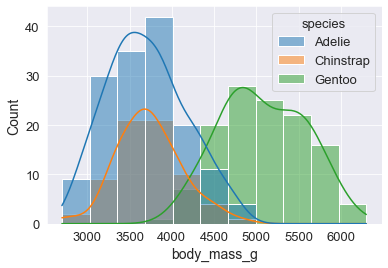

In [211]:
# https://datavizpyr.com/histograms-with-density-plots-with-seaborn-histplot/

#plt.figure(figsize=(9,6))
sns.histplot(x= "body_mass_g",
             data=p,
              #bins=25,
              hue="species",
              kde=True)
#plt.savefig("Histograms_with_Multiple_Density_lines_Seaborn_histplot.jpg")

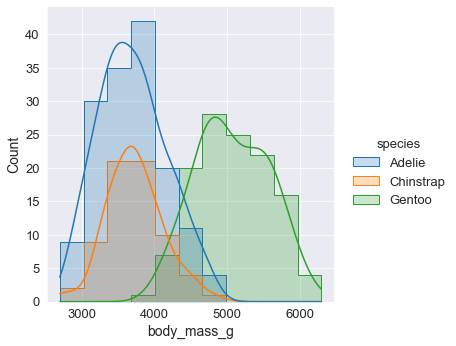

In [214]:
# https://seaborn.pydata.org/tutorial/distributions.html
sns.displot(p, x="body_mass_g", hue="species", element="step", kde=True)
plt.show()

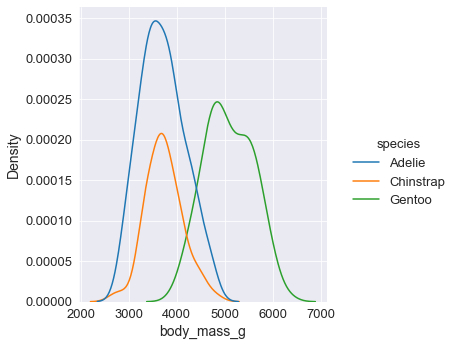

In [194]:
sns.displot(p, x="body_mass_g", hue="species", kind="kde")
plt.show()

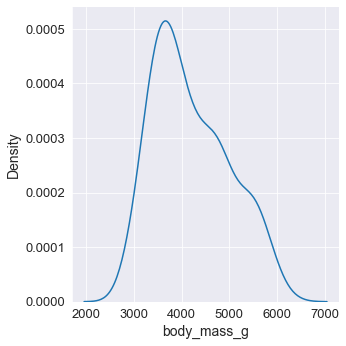

In [196]:
sns.displot(p, x="body_mass_g", kind="kde")
plt.show()

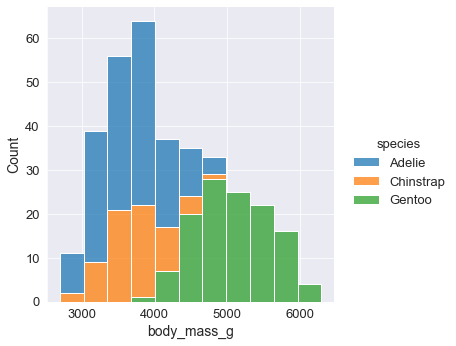

In [193]:
sns.displot(p, x="body_mass_g", hue="species", multiple="stack")
plt.show()

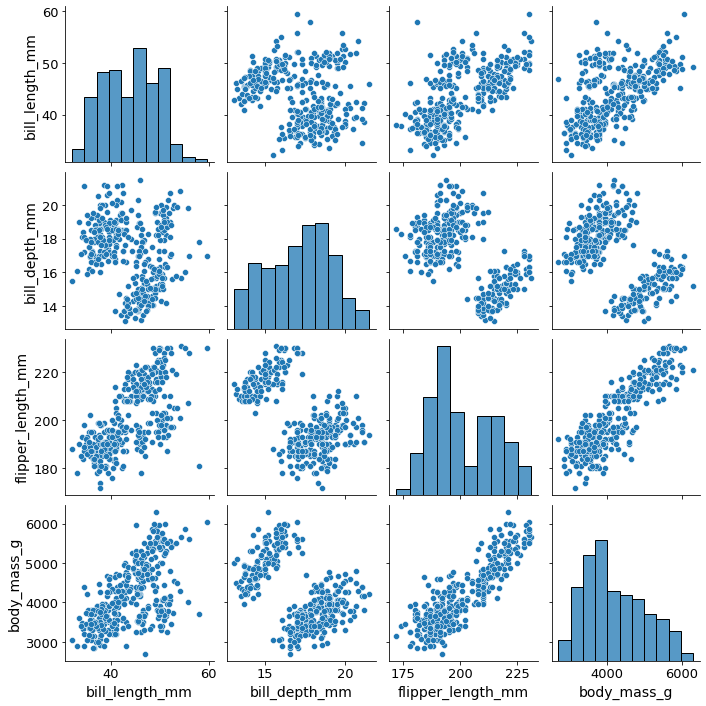

In [177]:
sns.pairplot(p)
plt.show()

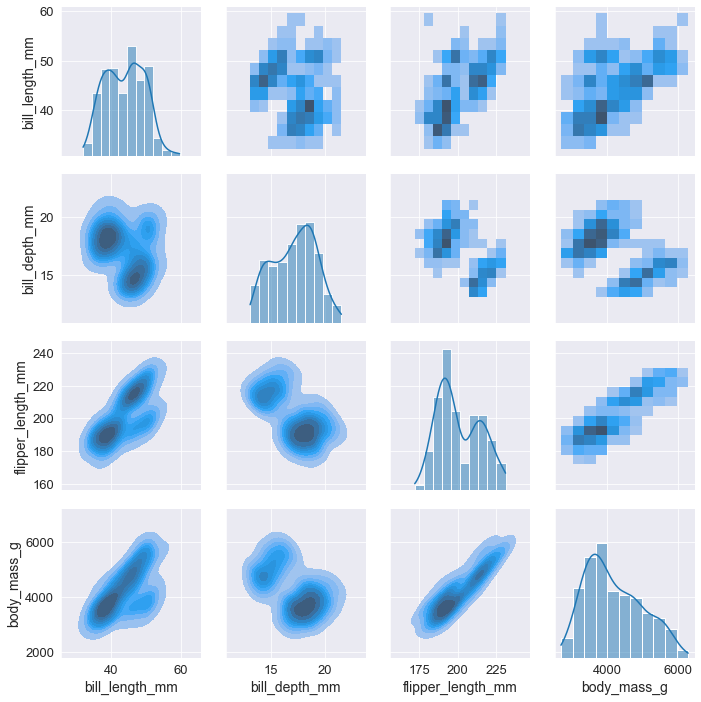

In [205]:
g = sns.PairGrid(p)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
plt.show()

### Questão 11
Ainda trabalhando com os valores das massas dos pinguins crie três Boxplots:

- Boxplot das massas para todos os pinguins
- Boxplot das massas dos pinguins separados pelo sexo.
- Boxplot das massas dos pinguins separados pelo sexo e pela espécies.

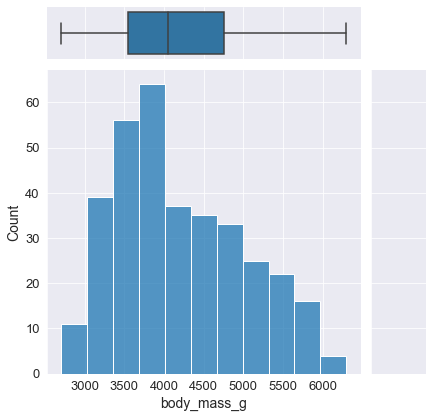

In [277]:
g = sns.JointGrid(data=p, x="body_mass_g")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)
plt.show()

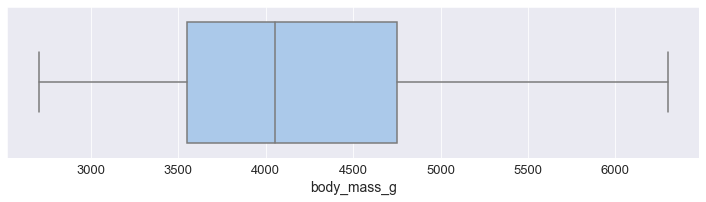

In [282]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
    
plt.figure(figsize=(10,3), tight_layout=True)
ax = sns.boxplot(data=p, x="body_mass_g", palette=colors)
plt.show()

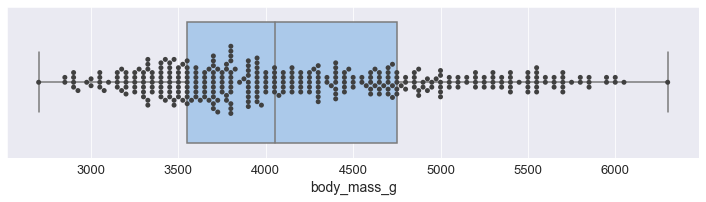

In [284]:
plt.figure(figsize=(10,3), tight_layout=True)
ax = sns.boxplot(data=p, x="body_mass_g", palette=colors)
ax = sns.swarmplot(data=p, x="body_mass_g", color=".25")
plt.show()

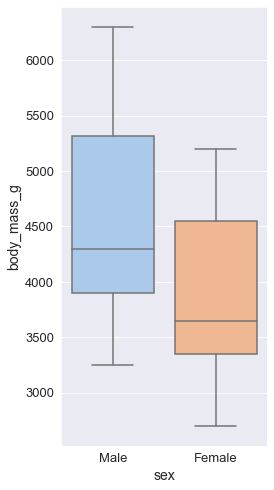

In [296]:
plt.figure(figsize=(4,7), tight_layout=True)
ax = sns.boxplot(data=p, x="sex", y="body_mass_g", palette=colors)
plt.show()

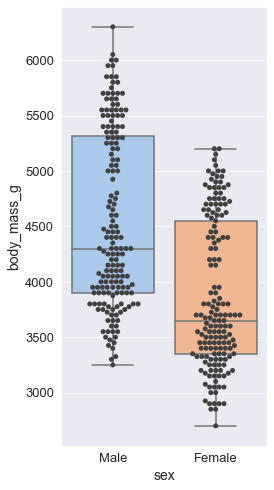

In [297]:
plt.figure(figsize=(4,7), tight_layout=True)
ax = sns.boxplot(data=p, x="sex", y="body_mass_g", palette=colors)
ax = sns.swarmplot(data=p, x="sex", y="body_mass_g", color=".25")
plt.show()

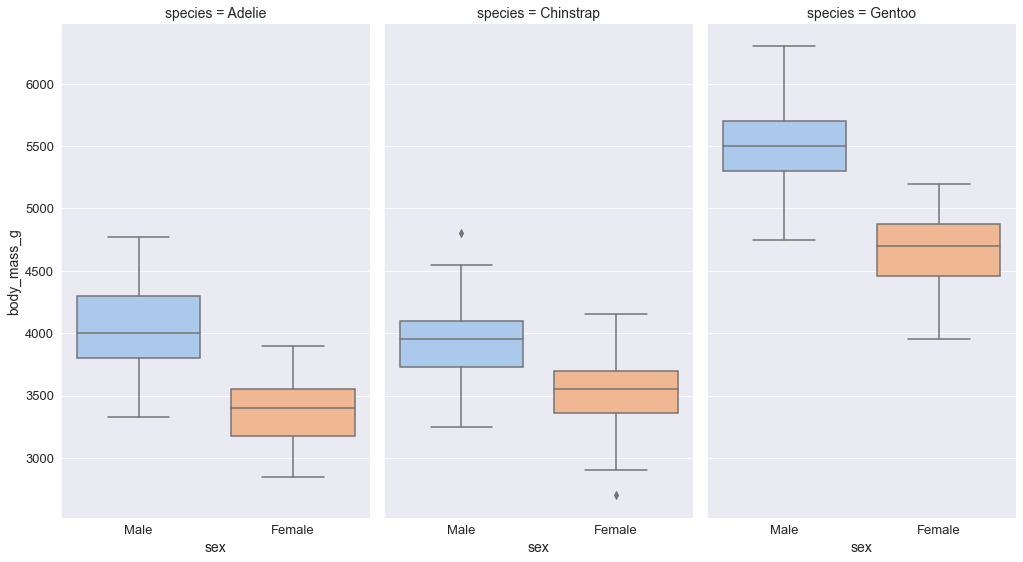

In [298]:
g = sns.catplot(x="sex", y="body_mass_g",
                col="species",
                data=p, kind="box", palette=colors
               ,height=8, aspect=.6
               );
plt.show()